# mehmetfatihdata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
education = pd.read_csv("education.csv",index_col=0)

# Q1:
Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [3]:
s_4=(education['AVG_MATH_4_SCORE']+ education['AVG_READING_4_SCORE'])/2
s_8=(education['AVG_MATH_8_SCORE']+ education['AVG_READING_8_SCORE'])/2
education["SPECİAL_SCORE_AV"]=((education["GRADES_4_G"]*s_4)+(education ['GRADES_8_G']*s_8))/(education["GRADES_4_G"]+education ['GRADES_8_G'])

# Q2:
Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [4]:
col=['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [5]:
education_ex=education.drop(col,axis=1)

In [6]:
korelasyon=education_ex.corr()

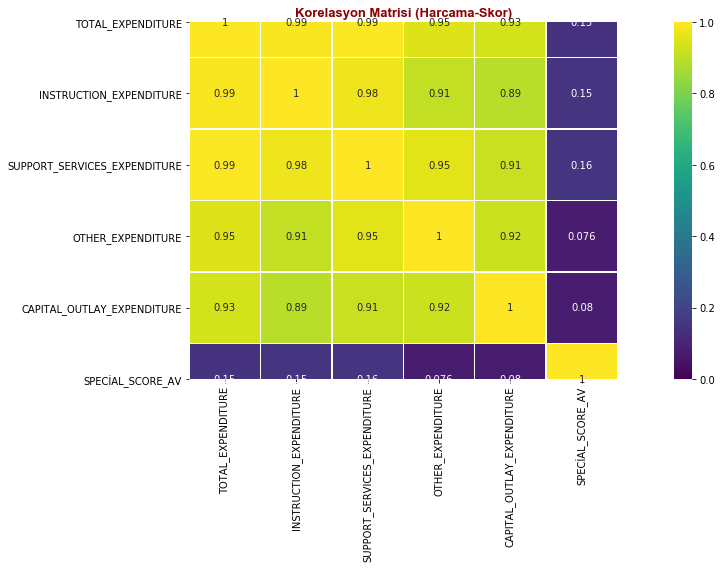

In [7]:
plt.figure(figsize=(16,8))

sns.heatmap(korelasyon, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Harcama-Skor)", fontdict=baslik_font)

plt.tight_layout()
plt.show()

# Q3:
Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?


In [28]:
X = education_ex.drop(['TOTAL_EXPENDITURE','SPECİAL_SCORE_AV'],1)
y = education_ex['TOTAL_EXPENDITURE']

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'x' is not defined

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
education_ex.columns

Index(['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'SPECİAL_SCORE_AV'],
      dtype='object')

# Q4: 
Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

# Q5: 
Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

BİTTİ.